<a href="https://colab.research.google.com/github/TaruSora/NLP_100knock/blob/main/100knock_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 問題50のコードをそのまま利用
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip
!sed -e 's/"/'\''/g' newsCorpora.csv > newsCorpora_re.csv

--2022-04-13 01:16:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  24.6MB/s    in 1.1s    

2022-04-13 01:16:12 (24.6 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

train, tmp = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['CATEGORY'])
valid, test = train_test_split(tmp, test_size=0.5, shuffle=True, random_state=42, stratify=tmp['CATEGORY'])

train.to_csv('train.txt', sep='\t', index=False)
valid.to_csv('valid.txt', sep='\t', index=False)
test.to_csv('test.txt', sep='\t', index=False)

print('学習用データ')
print(train['CATEGORY'].value_counts())
print('評価用データ')
print(valid['CATEGORY'].value_counts())
print('テスト用データ')
print(test['CATEGORY'].value_counts())

学習用データ
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
評価用データ
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
テスト用データ
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


70.問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

In [3]:
import gdown
from gensim.models import KeyedVectors

# 学習済み単語ベクトルのダウンロード
url = "https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM"
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=True)

# ダウンロードファイルのロード
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/100本ノック/第7章/GoogleNews-vectors-negative300.bin.gz', binary=True)

Access denied with the following error:



 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM 



In [4]:
# 70 単語ベクトルの和による特徴量

import torch
import string

def w2v(text):
    code_regex = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(code_regex)
    words = text.split()
    vec = [model[word] for word in words if word in model]

    return torch.tensor(sum(vec)/len(vec))

def makeVec(input, features, labels):
    with open(input, 'r') as f:
        category_dict={'b': 0, 't': 1, 'e':2, 'm':3}
        df = pd.read_csv(input, sep='\t')
        
        X = torch.stack([w2v(text) for text in df['TITLE']])
        y = torch.tensor(df['CATEGORY'].map(category_dict))
        torch.save(X, features)
        torch.save(y, labels)
        return X,y

X_train, y_train = makeVec('train.txt', './drive/MyDrive/100本ノック/第8章/X_train.pt', './drive/MyDrive/100本ノック/第8章/y_train.pt')
X_valid, y_valid = makeVec('valid.txt', './drive/MyDrive/100本ノック/第8章/X_valid.pt', './drive/MyDrive/100本ノック/第8章/y_valid.pt')
X_test, y_test = makeVec('test.txt', './drive/MyDrive/100本ノック/第8章/y_test.pt', './drive/MyDrive/100本ノック/第8章/y_valid.pt')

In [5]:
print(X_train.size())
print(X_train)

torch.Size([10684, 300])
tensor([[-0.0295,  0.0653, -0.0597,  ..., -0.0425,  0.0027,  0.0337],
        [-0.0255,  0.0341,  0.0286,  ...,  0.0039,  0.0291, -0.0840],
        [ 0.0564, -0.0839, -0.1227,  ...,  0.0672,  0.1786, -0.1000],
        ...,
        [ 0.1737, -0.1069, -0.1205,  ..., -0.0406,  0.1069, -0.0029],
        [-0.0738, -0.0352, -0.0405,  ...,  0.0280,  0.0646,  0.0919],
        [ 0.0394,  0.0317,  0.0094,  ...,  0.0160,  0.0709,  0.0104]])


In [6]:
print(y_train[:30])

tensor([0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 2])


71.問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

In [7]:
# 71 単層ニューラルネットワークによる予測

from torch import nn

class singleNet(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.fc = nn.Linear(n_input, n_output, bias=False)
        nn.init.normal_(self.fc.weight, 0.0, 1.0) 

    def forward(self, x):
        x = self.fc(x)
        return x

model1 = singleNet(300, 4)
y_hat_1 = torch.softmax(model1(X_train[:1]), dim=-1)
print(y_hat_1)
y_hat = torch.softmax(model1.forward(X_train[:4]), dim=-1)
print(y_hat)

tensor([[0.0775, 0.2344, 0.4707, 0.2174]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0775, 0.2344, 0.4707, 0.2174],
        [0.3224, 0.0216, 0.3280, 0.3280],
        [0.4164, 0.0515, 0.5001, 0.0320],
        [0.1869, 0.4600, 0.3501, 0.0031]], grad_fn=<SoftmaxBackward0>)


72.学習データの事例x1と事例集合x1,x2,x3,x4に対して，クロスエントロピー損失と，行列Wに対する勾配を計算せよ．

In [8]:
# 72 損失と勾配の計算

criterion = nn.CrossEntropyLoss() # 損失関数
l_1 = criterion(model1(X_train[:1]), y_train[:1]) # 事例x1の損失
model1.zero_grad() # 勾配を初期化
l_1.backward()
print(f'損失: {l_1:.4f}')
print(f'勾配:\n{model1.fc.weight.grad}')

l = criterion(model1(X_train[:4]), y_train[:4]) # 事例集合x1,x2,x3,x4の損失
model1.zero_grad()
l.backward()
print(f'損失: {l:.4f}')
print(f'勾配:\n{model1.fc.weight.grad}')

損失: 2.5577
勾配:
tensor([[ 0.0272, -0.0602,  0.0551,  ...,  0.0392, -0.0025, -0.0311],
        [-0.0069,  0.0153, -0.0140,  ..., -0.0100,  0.0006,  0.0079],
        [-0.0139,  0.0307, -0.0281,  ..., -0.0200,  0.0013,  0.0159],
        [-0.0064,  0.0142, -0.0130,  ..., -0.0092,  0.0006,  0.0073]])
損失: 1.4038
勾配:
tensor([[ 0.0086, -0.0100,  0.0296,  ..., -0.0038, -0.0320,  0.0246],
        [ 0.0130, -0.0006,  0.0020,  ..., -0.0092,  0.0015,  0.0089],
        [-0.0184,  0.0049, -0.0298,  ...,  0.0145,  0.0266, -0.0277],
        [-0.0031,  0.0057, -0.0018,  ..., -0.0015,  0.0039, -0.0058]])


73.確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列Wを学習せよ．

In [9]:
# 73 確率的勾配降下法による学習

from torch.utils.data import TensorDataset, DataLoader

model2 = singleNet(300, 4)
batch_size=1

# Datasetの作成
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
test = TensorDataset(X_test, y_test)
# Dataloaderの作成
dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
dataloader_valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
dataloader_test = DataLoader(test, batch_size=batch_size, shuffle=False)

# 損失関数、オプティマイザ
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-1)

epochs = 30
for epoch in range(epochs):
    model2.train()
    loss_train = 0.0
    for i, (x, t) in enumerate(dataloader_train):
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model2(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()
        loss_train += loss
    loss_train=loss_train/i
    
    print(f'epoch: {epoch+1}, loss_train: {loss_train:.4f}')

epoch: 1, loss_train: 0.4707
epoch: 2, loss_train: 0.3192
epoch: 3, loss_train: 0.2882
epoch: 4, loss_train: 0.2724
epoch: 5, loss_train: 0.2622
epoch: 6, loss_train: 0.2548
epoch: 7, loss_train: 0.2503
epoch: 8, loss_train: 0.2461
epoch: 9, loss_train: 0.2422
epoch: 10, loss_train: 0.2400
epoch: 11, loss_train: 0.2370
epoch: 12, loss_train: 0.2363
epoch: 13, loss_train: 0.2334
epoch: 14, loss_train: 0.2321
epoch: 15, loss_train: 0.2305
epoch: 16, loss_train: 0.2303
epoch: 17, loss_train: 0.2290
epoch: 18, loss_train: 0.2278
epoch: 19, loss_train: 0.2271
epoch: 20, loss_train: 0.2260
epoch: 21, loss_train: 0.2254
epoch: 22, loss_train: 0.2250
epoch: 23, loss_train: 0.2238
epoch: 24, loss_train: 0.2240
epoch: 25, loss_train: 0.2230
epoch: 26, loss_train: 0.2227
epoch: 27, loss_train: 0.2228
epoch: 28, loss_train: 0.2222
epoch: 29, loss_train: 0.2217
epoch: 30, loss_train: 0.2208


74.問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

In [10]:
# 74 正解率の計測

def calc_acc(model, dataloader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, t in dataloader:
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            total += len(x)
            correct += (pred == t).sum().item()
    acc = correct/total
    return acc

train_acc = calc_acc(model2, dataloader_train)
test_acc = calc_acc(model2, dataloader_test)
print(f'学習用データの正解率：{train_acc:.4f}')
print(f'評価用データの正解率：{test_acc:.4f}')

学習用データの正解率：0.9247
評価用データの正解率：0.9042


75.問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [11]:
# 75 損失と正解率のプロット

import numpy as np
from matplotlib import pyplot as plt

# 74の関数で損失も計算できるように改変
def calc_acc_loss(model, dataloader):
    model.eval()
    total = 0
    correct = 0
    loss = 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, t in dataloader:
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            loss += criterion(y, t)
            total += len(x)
            correct += (pred == t).sum().item()
    
    acc = correct/total
    loss1 = loss/len(dataloader)
    return acc, loss1

model3 = singleNet(300, 4)
optimizer = torch.optim.SGD(model3.parameters(), lr=1e-1)

epochs = 30
train_log = []
valid_log = []
for epoch in range(epochs):
    model3.train()
    for i, (x, t) in enumerate(dataloader_train):
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model3(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model3, dataloader_train)
    valid_acc, valid_loss = calc_acc_loss(model3, dataloader_valid)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    print(f'epoch: {epoch+1}, train_acc: {train_acc:.4f}, train_loss: {train_loss:.4f},  valid_acc: {valid_acc:.4f}, valid_loss: {valid_loss:.4f}')

epoch: 1, train_acc: 0.8858, train_loss: 0.3262,  valid_acc: 0.8892, valid_loss: 0.3188
epoch: 2, train_acc: 0.9039, train_loss: 0.2881,  valid_acc: 0.8975, valid_loss: 0.2847
epoch: 3, train_acc: 0.9100, train_loss: 0.2688,  valid_acc: 0.9072, valid_loss: 0.2681
epoch: 4, train_acc: 0.9141, train_loss: 0.2594,  valid_acc: 0.9109, valid_loss: 0.2653
epoch: 5, train_acc: 0.9145, train_loss: 0.2512,  valid_acc: 0.9087, valid_loss: 0.2601
epoch: 6, train_acc: 0.9132, train_loss: 0.2482,  valid_acc: 0.9019, valid_loss: 0.2637
epoch: 7, train_acc: 0.9173, train_loss: 0.2421,  valid_acc: 0.9102, valid_loss: 0.2585
epoch: 8, train_acc: 0.9189, train_loss: 0.2365,  valid_acc: 0.9042, valid_loss: 0.2579
epoch: 9, train_acc: 0.9204, train_loss: 0.2334,  valid_acc: 0.9132, valid_loss: 0.2558
epoch: 10, train_acc: 0.9211, train_loss: 0.2315,  valid_acc: 0.9109, valid_loss: 0.2580
epoch: 11, train_acc: 0.9199, train_loss: 0.2324,  valid_acc: 0.9049, valid_loss: 0.2606
epoch: 12, train_acc: 0.9198, 

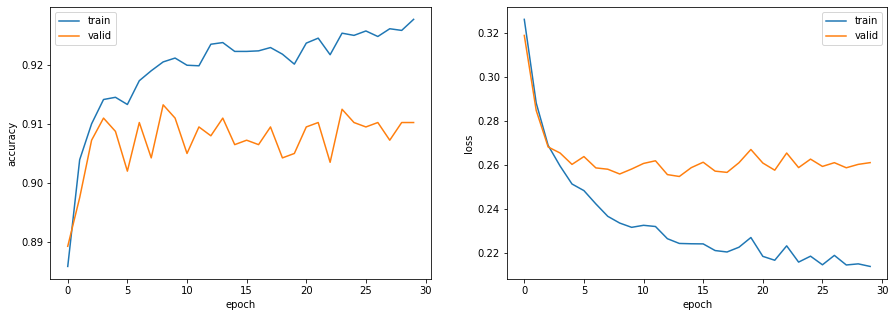

In [12]:
import numpy as np

figure, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(train_log).T[0], label='train')
ax[0].plot(np.array(valid_log).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend()
ax[1].plot(np.array(train_log).T[1], label='train')
ax[1].plot(np.array(valid_log).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend()
plt.show()

76.問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

In [13]:
# 76 チェックポイント

model4 = singleNet(300, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=1e-1)

epochs = 30
train_log = []
valid_log = []
for epoch in range(epochs):
    model4.train()
    train_loss = 0.0
    for x, t in dataloader_train:
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model4(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model4, dataloader_train)
    valid_acc, valid_loss = calc_acc_loss(model4, dataloader_valid)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    # チェックポイント保存
    torch.save({'epoch': epoch, 'model_state_dict': model4.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    print(f'epoch: {epoch+1}, train_acc: {train_acc:.4f}, train_loss: {train_loss:.4f},  valid_acc: {valid_acc:.4f}, valid_loss: {valid_loss:.4f}')

epoch: 1, train_acc: 0.8875, train_loss: 0.3287,  valid_acc: 0.8862, valid_loss: 0.3288
epoch: 2, train_acc: 0.9025, train_loss: 0.2872,  valid_acc: 0.9004, valid_loss: 0.2924
epoch: 3, train_acc: 0.9075, train_loss: 0.2709,  valid_acc: 0.9012, valid_loss: 0.2795
epoch: 4, train_acc: 0.9142, train_loss: 0.2582,  valid_acc: 0.9049, valid_loss: 0.2707
epoch: 5, train_acc: 0.9163, train_loss: 0.2487,  valid_acc: 0.9087, valid_loss: 0.2634
epoch: 6, train_acc: 0.9167, train_loss: 0.2447,  valid_acc: 0.9042, valid_loss: 0.2634
epoch: 7, train_acc: 0.9183, train_loss: 0.2396,  valid_acc: 0.9034, valid_loss: 0.2619
epoch: 8, train_acc: 0.9218, train_loss: 0.2375,  valid_acc: 0.9162, valid_loss: 0.2585
epoch: 9, train_acc: 0.9214, train_loss: 0.2323,  valid_acc: 0.9064, valid_loss: 0.2573
epoch: 10, train_acc: 0.9224, train_loss: 0.2309,  valid_acc: 0.9094, valid_loss: 0.2568
epoch: 11, train_acc: 0.9246, train_loss: 0.2275,  valid_acc: 0.9109, valid_loss: 0.2534
epoch: 12, train_acc: 0.9212, 

77.問題76のコードを改変し，B事例ごとに損失・勾配を計算し，行列Wの値を更新せよ（ミニバッチ化）．Bの値を1,2,4,8,…と変化させながら，1エポックの学習に要する時間を比較せよ．

In [14]:
# 77 ミニバッチ化

import time

def model_function(train, valid, model, batch_size):
    dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

    train_log = []
    valid_log = []

    # 時間の計測
    start = time.time()

    # 1エポックの学習時間を比較するためループは回さない
    model.train()
    train_loss = 0.0
    for x, t in dataloader_train:
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model, dataloader_train)
    valid_acc, valid_loss = calc_acc_loss(model, dataloader_valid)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    # チェックポイント保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')
    
    end = time.time()
    timeval = end - start

    return train_acc, train_loss, valid_acc, valid_loss, timeval

In [15]:
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
model5 = singleNet(300, 4)

for i in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    print(f'バッチサイズ：{i}')
    train_acc, trian_loss, valid_acc, valid_loss, timeval = model_function(train, valid, model5, i)
    print(f'train_acc: {train_acc:.4f}, train_loss: {train_loss:.4f}, valid_acc: {valid_acc:.4f}, valid_loss: {valid_loss:.4f}, time: {timeval:.4f} sec')

バッチサイズ：1
train_acc: 0.8829, train_loss: 0.2139, valid_acc: 0.8780, valid_loss: 0.3095, time: 3.6205 sec
バッチサイズ：2
train_acc: 0.8956, train_loss: 0.2139, valid_acc: 0.8877, valid_loss: 0.2892, time: 2.0132 sec
バッチサイズ：4
train_acc: 0.8995, train_loss: 0.2139, valid_acc: 0.8900, valid_loss: 0.2834, time: 1.1285 sec
バッチサイズ：8
train_acc: 0.8997, train_loss: 0.2139, valid_acc: 0.8960, valid_loss: 0.2801, time: 0.6218 sec
バッチサイズ：16
train_acc: 0.9006, train_loss: 0.2139, valid_acc: 0.8952, valid_loss: 0.2801, time: 0.3734 sec
バッチサイズ：32
train_acc: 0.9007, train_loss: 0.2139, valid_acc: 0.8952, valid_loss: 0.2779, time: 0.2605 sec
バッチサイズ：64
train_acc: 0.9012, train_loss: 0.2139, valid_acc: 0.8960, valid_loss: 0.2780, time: 0.1886 sec
バッチサイズ：128
train_acc: 0.9011, train_loss: 0.2139, valid_acc: 0.8960, valid_loss: 0.2783, time: 0.1702 sec
バッチサイズ：256
train_acc: 0.9011, train_loss: 0.2139, valid_acc: 0.8960, valid_loss: 0.2789, time: 0.1523 sec
バッチサイズ：512
train_acc: 0.9011, train_loss: 0.2139, valid_a

78.問題77のコードを改変し，GPU上で学習を実行せよ.

In [16]:
# 78 GPU上での学習

import time
# 75の関数を改変
def calc_acc_loss(model, dataloader, device):
    model.eval()
    total = 0
    correct = 0
    loss = 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, t in dataloader:
            x = x.to(device)
            t = t.to(device)
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            loss += criterion(y, t)
            total += len(x)
            correct += (pred == t).sum().item()
    
    acc = correct/total
    loss1 = loss/len(dataloader)
    return acc, loss1

# 77の関数を改変
def model_function(train, valid, model, batch_size, device):
    model.to(device)
    dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

    train_log = []
    valid_log = []

    # 時間の計測
    start = time.time()

    # 1エポックの学習時間を比較するためループは回さない
    model.train()
    train_loss = 0.0
    for x, t in dataloader_train:
        # データをGPUへ転送
        x = x.to(device)
        t = t.to(device)
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model, dataloader_train, device)
    valid_acc, valid_loss = calc_acc_loss(model, dataloader_valid, device)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    # チェックポイント保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')
    
    end = time.time()
    timeval = end - start

    return train_acc, train_loss, valid_acc, valid_loss, timeval

In [17]:
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
model6 = singleNet(300, 4)
device = torch.device('cuda:0')

for batch_size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    print(f'バッチサイズ：{batch_size}')
    train_acc, train_loss, valid_acc, valid_loss, timeval = model_function(train, valid, model6, batch_size, device)
    print(f'train_acc: {train_acc:.4f}, train_loss: {train_loss:.4f}, valid_acc: {valid_acc:.4f}, valid_loss: {valid_loss:.4f}, time: {timeval:.4f} sec')

バッチサイズ：1
train_acc: 0.8825, train_loss: 0.3358, valid_acc: 0.8787, valid_loss: 0.3272, time: 9.6226 sec
バッチサイズ：2
train_acc: 0.8954, train_loss: 0.3057, valid_acc: 0.8862, valid_loss: 0.3016, time: 4.7272 sec
バッチサイズ：4
train_acc: 0.8989, train_loss: 0.2975, valid_acc: 0.8952, valid_loss: 0.2940, time: 2.4385 sec
バッチサイズ：8
train_acc: 0.9009, train_loss: 0.2920, valid_acc: 0.8937, valid_loss: 0.2896, time: 1.2969 sec
バッチサイズ：16
train_acc: 0.9015, train_loss: 0.2901, valid_acc: 0.8937, valid_loss: 0.2880, time: 0.7300 sec
バッチサイズ：32
train_acc: 0.9018, train_loss: 0.2892, valid_acc: 0.8975, valid_loss: 0.2867, time: 0.4344 sec
バッチサイズ：64
train_acc: 0.9019, train_loss: 0.2888, valid_acc: 0.8960, valid_loss: 0.2868, time: 0.2597 sec
バッチサイズ：128
train_acc: 0.9019, train_loss: 0.2885, valid_acc: 0.8960, valid_loss: 0.2866, time: 0.1930 sec
バッチサイズ：256
train_acc: 0.9020, train_loss: 0.2889, valid_acc: 0.8960, valid_loss: 0.2866, time: 0.1602 sec
バッチサイズ：512
train_acc: 0.9020, train_loss: 0.2884, valid_a

79.問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．


In [18]:
# 79 多層ニューラルネットワーク

import torch.nn.functional as F

class multiNet(nn.Module):
    def __init__(self, n_input, n_mid, n_output, n_layer):
        super().__init__()
        self.n_layer = n_layer
        self.fc_in = nn.Linear(n_input, n_mid)
        self.fc_mid = nn.Linear(n_mid, n_mid)
        self.fc_out = nn.Linear(n_mid, n_output)
        self.bn = nn.BatchNorm1d(n_mid)
    def forward(self, x):
        x = F.relu(self.fc_in(x))
        for _ in range(self.n_layer):
            x = F.relu(self.bn(self.fc_mid(x)))
        x = F.relu(self.fc_out(x))

        return x

In [19]:
# 78の関数
def calc_acc_loss(model, dataloader, device):
    model.eval()
    total = 0
    correct = 0
    loss = 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, t in dataloader:
            x = x.to(device)
            t = t.to(device)
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            loss += criterion(y, t)
            total += len(x)
            correct += (pred == t).sum().item()
    
    acc = correct/total
    loss1 = loss/len(dataloader)
    return acc, loss1

# 78の関数を改変
def model_function(train, valid, model, batch_size, device, epochs):
    import time
    from torch import optim
    model.to(device)
    dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(valid, batch_size=len(valid), shuffle=False)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs, eta_min=1e-5, last_epoch=-1)

    train_log = []
    valid_log = []
    for epoch in range(epochs):
        # 時間の計測
        start = time.time()

        model.train()
        train_loss = 0.0
        for x, t in dataloader_train:
            # データをGPUへ転送
            x = x.to(device)
            t = t.to(device)
            # 勾配の初期化
            optimizer.zero_grad()
            # 順伝播→誤差逆伝播→重み更新
            y = model.forward(x)
            loss = criterion(y, t)
            loss.backward()
            optimizer.step()

        train_acc, train_loss = calc_acc_loss(model, dataloader_train, device)
        valid_acc, valid_loss = calc_acc_loss(model, dataloader_valid, device)
        train_log.append([train_acc, train_loss])
        valid_log.append([valid_acc, valid_loss])

        # チェックポイント保存
        torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')
        
        end = time.time()
        timeval = end - start
        
        print(f'epoch: {epoch + 1}, loss_train: {train_loss}, accuracy_train: {train_acc}, loss_valid: {valid_loss}, accuracy_valid: {valid_acc}, {time}sec')

        # 3エポック連続で損失が減らなかった場合学習終了
        if epoch > 2 and valid_log[epoch-3][0] <= valid_log[epoch-2][0] <= valid_log[epoch-1][0] <= valid_log[epoch][0]:
            break

        scheduler.step()

    return {'train': train_log, 'valid': valid_log}

In [20]:
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
model7 = multiNet(300, 200, 4, 1)

device = torch.device('cuda:0')

log = model_function(train, valid, model7, 64, device, 1000)

epoch: 1, loss_train: 0.2340352088212967, accuracy_train: 0.9213777611381505, loss_valid: 0.25414276123046875, accuracy_valid: 0.9124251497005988, <module 'time' (built-in)>sec
epoch: 2, loss_train: 0.19504506886005402, accuracy_train: 0.9353238487457881, loss_valid: 0.25212621688842773, accuracy_valid: 0.9124251497005988, <module 'time' (built-in)>sec
epoch: 3, loss_train: 0.1668798178434372, accuracy_train: 0.9422500935979035, loss_valid: 0.25386396050453186, accuracy_valid: 0.9146706586826348, <module 'time' (built-in)>sec
epoch: 4, loss_train: 0.12750814855098724, accuracy_train: 0.9598464994384126, loss_valid: 0.23833850026130676, accuracy_valid: 0.9146706586826348, <module 'time' (built-in)>sec


In [21]:
# 正解率の計算

def calc_acc_single(model, dataloader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, t in dataloader:
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            total += len(x)
            correct += (pred == t).sum().item()
    acc = correct/total
    return acc

def calc_acc_multi(model, dataloader, device):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, t in dataloader:
            x = x.to(device)
            t = t.to(device)
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            total += len(x)
            correct += (pred == t).sum().item()
    acc = correct/total
    return acc

train_acc = calc_acc_single(model2, dataloader_train)
test_acc = calc_acc_single(model2, dataloader_test)
print('単層ネットワーク')
print(f'学習用データの正解率：{train_acc:.4f}')
print(f'評価用データの正解率：{test_acc:.4f}')

dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
dataloader_valid = DataLoader(valid, batch_size=len(valid), shuffle=False)

train_acc = calc_acc_multi(model7, dataloader_train, device)
test_acc = calc_acc_multi(model7, dataloader_test, device)
print('\n多層ネットワーク')
print(f'学習用データの正解率：{train_acc:.4f}')
print(f'評価用データの正解率：{test_acc:.4f}')

単層ネットワーク
学習用データの正解率：0.9247
評価用データの正解率：0.9042

多層ネットワーク
学習用データの正解率：0.9598
評価用データの正解率：0.9199
